<a href="https://colab.research.google.com/github/parth2102/CE888-7-SP-Data-Science-and-Decision-Making/blob/main/Labs/lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle as pkl

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from google.colab import drive
from sklearn.compose import ColumnTransformer
from time import perf_counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle as pkl

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.columns
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df = df.dropna()

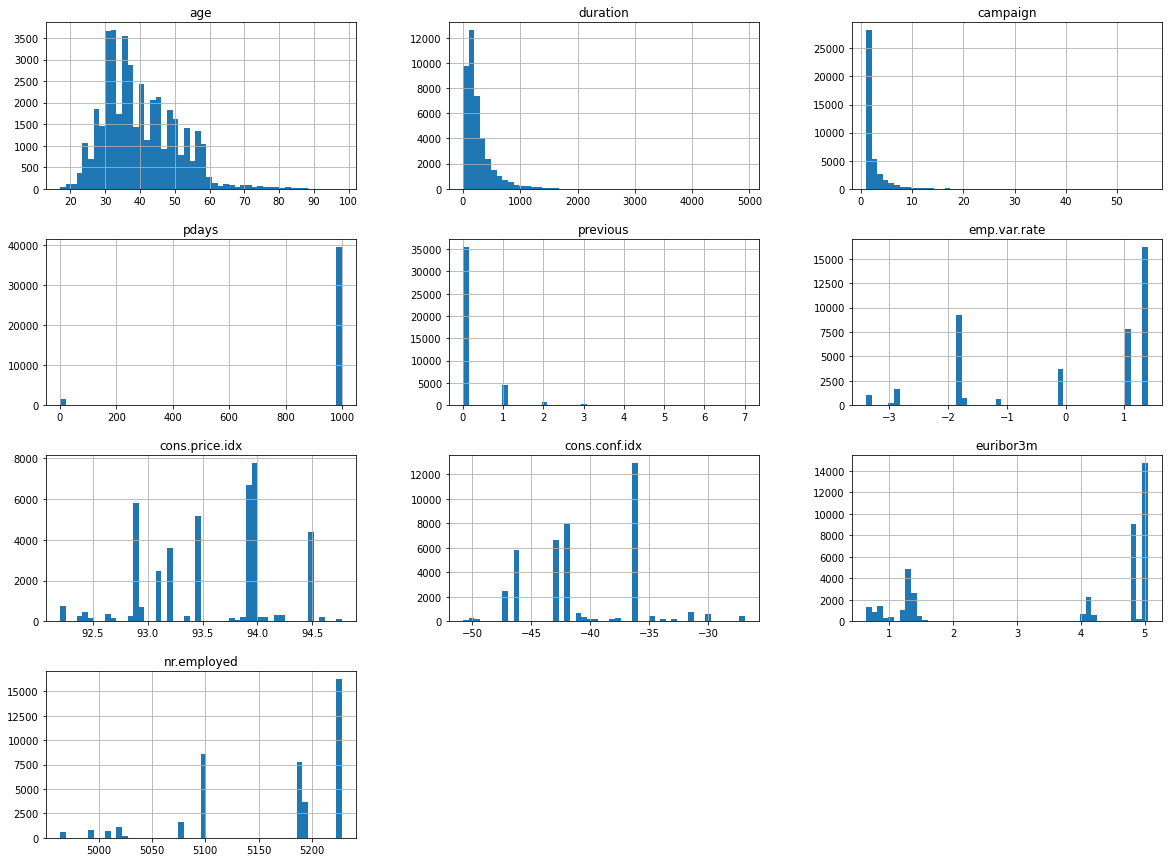

In [8]:
_ = df.hist(bins=50, figsize=(20,15))

In [24]:
column = ['y']
label = LabelEncoder()
for column in column:
  df[column] = label.fit_transform(df[column])

In [25]:
data = pd.get_dummies(df)
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


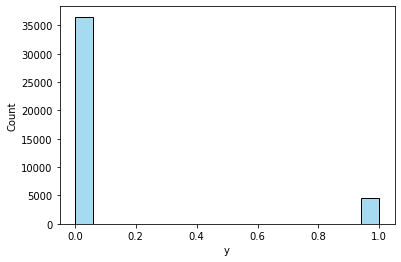

In [27]:
p = sns.histplot(data=data, x="y", color="skyblue")

**Modelling**


In [32]:
x = data.drop(labels='y', axis=1)
y = data['y']
#test, train, split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify= y)
x, y = y_train.value_counts()
x, y = y_test.value_counts()

In [31]:
def boost_random(clf,round,x_train,y_train):
  score = []
  for i in range(round):
    score.append(cross_val_score(clf, x_train, y_train, cv = 10, scoring='f1'))
  return np.mean(score), np.std(score)

In [33]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=8)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest = RandomForestClassifier(n_estimators=250, max_depth=6)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest f1 score: 0.37 +/- 0.046
randomforest f1 score: 0.31 +/- 0.046


In [34]:
from sklearn.metrics import f1_score
randomforest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
randomforest.fit(x_train,y_train)
y_pred = randomforest.predict(x_test)
score = f1_score(y_test,y_pred)
print("f1 score: " % (score))

f1 score: 


In [35]:
randomforest = RandomForestClassifier(n_estimators=100 , max_depth=10)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

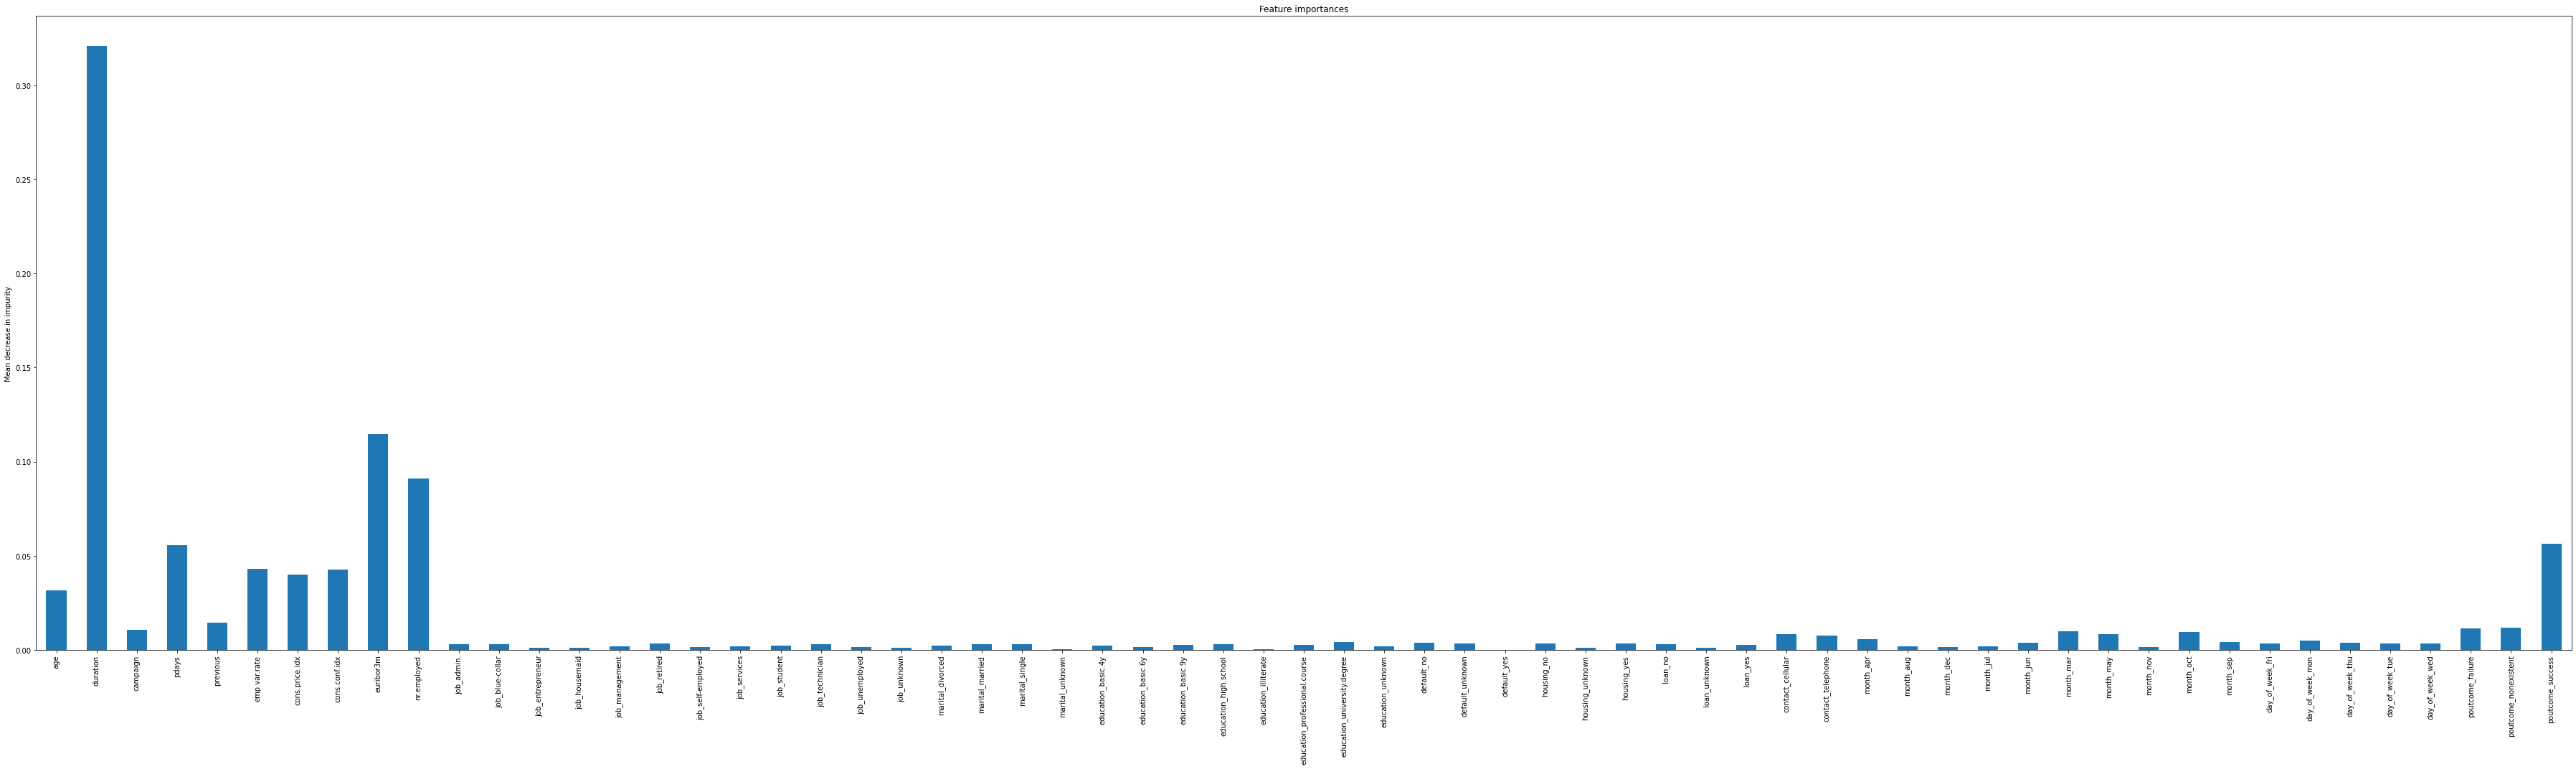

In [39]:
outp = open('model.pkl', 'wb')
pkl.dump(randomforest, outp, -1)
outp.close()
testset = pd.concat([x_test, y_test], axis=1, join="inner")
testset.to_csv('testset.csv', encoding = 'utf-8-sig')
feature_name = x_train.columns
importances = randomforest.feature_importances_
forest_importances = pd.Series(importances, index=feature_name)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(15)
fig.set_figwidth(50)
fig.tight_layout()

In [41]:
dum_clf = DummyClassifier(strategy='stratified')
dum_scores = cross_val_score(dum_clf, x_train, y_train, cv=10, scoring = 'f1')
print("f1 score: %0.6f +/- %0.6f" % (dum_scores.mean(), dum_scores.std()))

f1 score: 0.120048 +/- 0.016482


In [42]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=8)
rf.fit(x_train,y_train)
y_pre = rf.predict(x_test)
print('f1 score:',f1_score(y_test,y_pre))

f1 score: 0.38596491228070184


In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df = df.drop(labels='duration', axis=1)
label = LabelEncoder()
df['y'] = label.fit_transform(df['y'])
data = pd.get_dummies(df)

In [48]:
x = data.drop(labels='y', axis=1)
y = data['y']
s = SMOTE()
X_res, y_res = s.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=50, stratify= y_res)
pca = PCA(n_components=7)
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.transform(x_test)
cl = RandomForestClassifier()
cl.fit(x_train_n,y_train)
y_pred = cl.predict(x_test_n)
score = f1_score(y_test,y_pred)
print("f1 score: %0.2f" % (score))

f1 score: 0.90


In [47]:
column = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7',]
x_frame = pd.DataFrame(x_test, columns = column)
y_frame = pd.DataFrame(y_test, columns = ['y'])
testset = pd.concat([x_frame, y_frame], axis=1, join="inner")
testset.to_csv('testset.csv', encoding = 'utf-8-sig') 